# English  Handwritten Characters

### Introduction
This dataset contains 3,410 images of handwritten characters in English. This is a classification dataset that can be used for Computer Vision tasks. It contains 62 classes with 55 images of each class. The 62 classes are 0-9, A-Z and a-z.

## Import

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [7]:
FILE = "english.csv"

In [8]:
df = pd.read_csv(FILE)

In [9]:
df

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3410 non-null   object
 1   label   3410 non-null   object
dtypes: object(2)
memory usage: 53.4+ KB


In [11]:
df.nunique()

image    3410
label      62
dtype: int64

In [12]:
unique_labels = df["label"].unique()
unique_labels

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype=object)

In [13]:
value_counts = df.label.value_counts().to_frame()
value_counts

,label
l,55
n,55
4,55
s,55
L,55
...,...
N,55
J,55
h,55
0,55


In [14]:
import os
directory = "./Img/"
images = os.listdir(directory)
number_files = len(images)
number_files

3410

In [15]:
df['label'].unique().shape

(62,)

In [16]:
# Search
# i=df[df['image']=='Img/img003-022.png']
df_unique = pd.DataFrame(columns=["image", "label"])

for i in range(0,df.shape[0]):
    if df['label'][i] not in df_unique['label'].to_list():
        df_unique = df_unique.append({'image':df['image'][i], 'label':df['label'][i]}, ignore_index=True)
        


In [17]:
df_unique

,image,label
0,Img/img001-001.png,0
1,Img/img002-001.png,1
2,Img/img003-001.png,2
3,Img/img004-001.png,3
4,Img/img005-001.png,4
...,...,...
57,Img/img058-001.png,v
58,Img/img059-001.png,w
59,Img/img060-001.png,x
60,Img/img061-001.png,y


In [13]:
# Print 5 random images
import matplotlib.image as mpimg

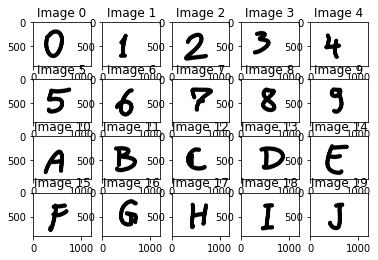

In [14]:
# The first 20
for i in range(0, 20):
    img = mpimg.imread(df_unique['image'][i])
    plt.subplot(4,5,i+1)
    plt.title("Image {}".format(i))
    plt.imshow(img)



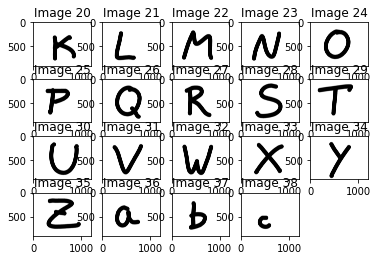

In [15]:
# The second 20
for i, j in zip(range(20, 40), range(1,20)):
    img = mpimg.imread(df_unique['image'][i])
    plt.subplot(4,5,j)
    plt.title("Image {}".format(i))
    plt.imshow(img)


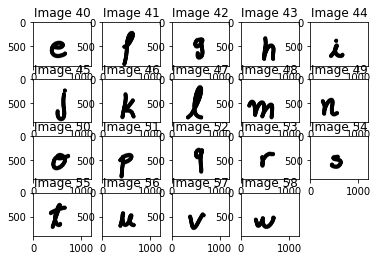

In [16]:
# The third 20
for i, j in zip(range(40, 63), range(1,20)):
    img = mpimg.imread(df_unique['image'][i])
    plt.subplot(4,5,j)
    plt.title("Image {}".format(i))
    plt.imshow(img)

## Processing Image

In [23]:
import cv2

In [18]:
def proc_images(images, labels):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    
    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
    WIDTH = 28
    HEIGHT = 28

    for img, label in zip(images, labels):

        # Read and resize image
        full_size_image = cv2.imread(img, 0) #(img, 0) if we need a gray picture 
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        
        #Add labels
        y.append(label)
    return x,y

In [460]:
# Recover image and label one by one
list_of_images = df['image'].to_list()
list_of_labels = df['label'].to_list()
len(list_of_images), len(list_of_labels)

(3410, 3410)

In [20]:
x, y = proc_images(list_of_images, list_of_labels)

In [21]:
# Set it up as a dataframe if you like
df_image = pd.DataFrame()
df_image["image"]=x
df_image["labels"]=y

In [22]:
df_image

,image,labels
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0
...,...,...
3405,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",z
3406,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",z
3407,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",z
3408,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",z


In [23]:
df_image['image'][0].shape

(28, 28)

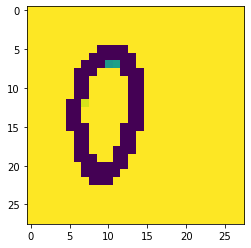

In [24]:
plt.imshow(df_image['image'][0])

In [31]:
from sklearn.preprocessing import OrdinalEncoder


In [26]:
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
list_labels = df['label'].to_list()
array = np.asarray(list_labels)
# reshape target to be a 2d array
y = array.reshape((len(array), 1))
result = encoder.fit_transform(y)
labels_in_array = [int(i) for i in result.T[0]] 
print(labels_in_array[:60])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [27]:
df_image["labels"] = result

In [28]:
OUTPUT_UNITS = df['label'].nunique()
OUTPUT_UNITS

62

# Tensorflow

In [91]:
array = np.random.rand(3,2)
array.shape

(3, 2)

In [106]:
weights = tf.Variable(tf.random_uniform([2,1], minval=-1, maxval=1))
input_placeholder = tf.placeholder(dtype=tf.float32, shape=[None,2], name='input')
bias = tf.Variable(tf.ones(shape=[1], dtype=tf.float32))

output = tf.add(tf.matmul(input_placeholder,weights), bias)

init = tf.initialize_all_variables()

with tf.Session() as session:
    session.run(init)
    array = np.random.rand(3,2)
    print(session.run(output, feed_dict={input_placeholder:array}))


[[1.0749174 ]
 [0.79258287]
 [0.78845924]]


#### for our project

In [109]:
def model(input_placeholder, weights_shape, bias_shape, name):
        with tf.name_scope(name):
            initial_w = tf.truncated_normal(shape=weights_shape, stddev=0.1, seed=42, dtype=tf.float64)
            weights = tf.Variable(initial_value=initial_w, name='weights_conf', dtype=tf.float64)
            initial_b = tf.constant(dtype=tf.float64, value=1.0, shape=bias_shape)
            bias = tf.Variable(dtype=tf.float64, initial_value=initial_b, name='bias_conf')
            matmul = tf.matmul(input_placeholder, weights, name="matmul")
            output = tf.add(matmul, bias,name='output')
            print(weights)
            if name=='out':
                layer_out = tf.nn.softmax(output)
            else:
                layer_out = tf.nn.relu(output)

            return layer_out


In [110]:
# Test
input_placeholder = tf.placeholder(dtype=tf.float64, shape=[None, 5], name='input_placeholder')

layer_out = model(input_placeholder=input_placeholder, weights_shape=[5,3],bias_shape=[3], name='out')

<tf.Variable 'out_6/weights_conf:0' shape=(5, 3) dtype=float64_ref>


In [111]:
# Create a random array
array = np.random.rand(5,5)
array

array([[0.8902114 , 0.46007823, 0.13499695, 0.58171959, 0.33968372],
       [0.58756383, 0.4520564 , 0.05349787, 0.25499997, 0.50164034],
       [0.60863087, 0.36505401, 0.59845678, 0.89291497, 0.96085984],
       [0.50604675, 0.54798069, 0.35090715, 0.13647403, 0.94226837],
       [0.88199497, 0.94560752, 0.03011235, 0.33546427, 0.63412228]])

In [112]:
with tf.Session() as session:
    init = tf.initialize_all_variables()
    session.run(init)
    print(session.run(layer_out, feed_dict={input_placeholder:array}))

[[0.33065666 0.28441229 0.38493105]
 [0.34441804 0.29130684 0.36427512]
 [0.32415759 0.28900507 0.38683734]
 [0.35138105 0.28595027 0.36266868]
 [0.34704955 0.2651508  0.38779965]]


In [114]:
input_placeholder = tf.placeholder(dtype=tf.float64, shape=[5,5], name='input_placeholder')

layer_1 = model(input_placeholder=input_placeholder, weights_shape=[5,3],bias_shape=[3], name='layer_1')

output = model(input_placeholder=layer_1, weights_shape=[3,2],bias_shape=[2], name='out')

<tf.Variable 'layer_1_7/weights_conf:0' shape=(5, 3) dtype=float64_ref>
<tf.Variable 'out_7/weights_conf:0' shape=(3, 2) dtype=float64_ref>


In [115]:
with tf.Session() as session:
    init = tf.initialize_all_variables()
    session.run(init)
    print(session.run(output, feed_dict={input_placeholder:array}))

[[0.48019226 0.51980774]
 [0.48481766 0.51518234]
 [0.47890235 0.52109765]
 [0.48539087 0.51460913]
 [0.48078257 0.51921743]]


In [117]:
input_placeholder = tf.placeholder(dtype=tf.float64, shape=[5,5], name='input_placeholder')

layer_1 = model(input_placeholder=input_placeholder, weights_shape=[5,3],bias_shape=[3], name='layer_1')

layer_2 = model(input_placeholder=layer_1, weights_shape=[3,1],bias_shape=[1], name='layer_2')

output = model(input_placeholder=layer_2, weights_shape=[1,1],bias_shape=[1], name='out')

<tf.Variable 'layer_1_9/weights_conf:0' shape=(5, 3) dtype=float64_ref>
<tf.Variable 'layer_2_2/weights_conf:0' shape=(3, 1) dtype=float64_ref>
<tf.Variable 'out_8/weights_conf:0' shape=(1, 1) dtype=float64_ref>


In [118]:
with tf.Session() as session:
    init = tf.initialize_all_variables()
    session.run(init)
    print(session.run(output, feed_dict={input_placeholder:array}))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


# Create a model for images model

## Loss, Optimisation & Metrics


#### Defining Loss Function


In [119]:
def loss_funtion(label, output):
    with tf.name_scope('loss_calc'):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=label, logits=output))

#### Defining Optimizer


In [120]:
def optimizer_function(learning_rate, loss):
    with tf.name_scope('optimizer'):
        optimizer = tf.train.AdamOptimizer(learning_rate)
        return optimizer.minimize(loss)

#### Accuracy Metric

In [121]:
def accuracy_function(real_values, output_values):
    with tf.name_scope('accuracy_calc'):
        correct_pred = tf.equal(tf.argmax(output_values, axis=1), tf.argmax(real_values, axis=1))
        return tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Batching the Data

In [375]:
df_image

,image,labels
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0.0
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0.0
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0.0
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0.0
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0.0
...,...,...
3405,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",61.0
3406,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",61.0
3407,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",61.0
3408,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",61.0


In [123]:
df_image['image'][0].shape

(28, 28)

In [124]:
def flatten(image_numpy):
    return image_numpy.flatten()

In [125]:
df_image_flatten = pd.DataFrame()

In [126]:
df_image_flatten['image'] = df_image['image'].apply(flatten)
df_image_flatten['label'] = df_image['labels']

In [127]:
df_image_flatten

,image,label
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0.0
1,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0.0
2,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0.0
3,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0.0
4,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",0.0
...,...,...
3405,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",61.0
3406,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",61.0
3407,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",61.0
3408,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",61.0


In [128]:
df_image_flatten['image'][0].shape[0]

784

### Create an array list of images

In [39]:
NUMBER_INPUTS = 784
PREDICT_CLASSES = 62

In [130]:
list_of_images = df_image_flatten['image'].to_list()

In [131]:
list_of_images[0]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   

In [262]:
images = np.asarray(list_of_images) 

In [263]:
images.shape

(3410, 784)

In [264]:
my_list = []
my_list.append(labels_in_array)
labels = np.asarray(my_list)[0]
print(labels.shape)
labels[:5]

(3410,)


array([0, 0, 0, 0, 0])

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, 
                                                    test_size=0.2, random_state=42)

In [266]:
print("X_train shape = {}, X_test shape is = {}".format(X_train.shape, X_test.shape))
print("y_train shape = {}, y_test shape is = {}".format(y_train.shape, y_test.shape))

X_train shape = (2728, 784), X_test shape is = (682, 784)
y_train shape = (2728,), y_test shape is = (682,)


In [267]:
y_train = np.eye(PREDICT_CLASSES)[y_train]
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [144]:
num_examples = y_train.shape[0] # 682
size_of_batch = 5
nr_iterations = int(num_examples/size_of_batch)
index_in_epoch = 0
nr_epochs = 20

In [145]:
def next_batch(batch_size, data, labels):
    
    global num_examples
    global index_in_epoch
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > num_examples:
        start = 0
        index_in_epoch = batch_size
    
    end = index_in_epoch
    
    return data[start:end], labels[start:end]

In [146]:
data, labels = next_batch(batch_size=size_of_batch, data=X_train, labels=y_train)
print(data.shape)
labels.shape

(5, 784)


(5, 62)

### Training Loop

In [147]:
# Model
X = tf.placeholder(dtype=tf.float64, shape=[None,NUMBER_INPUTS], name='input_images')
print(X)
layer_1 = model(input_placeholder=X, weights_shape=[784, 500], bias_shape=[500], name='layer_1')
layer_2 = model(input_placeholder=layer_1, weights_shape=[500, 250], bias_shape=[250], name='layer_2')
layer_3 = model(input_placeholder=layer_2, weights_shape=[250, 150], bias_shape=[150], name='layer_3')
layer_4 = model(input_placeholder=layer_3, weights_shape=[150, 100], bias_shape=[100], name='layer_4')
output = model(input_placeholder=layer_4, weights_shape=[100, PREDICT_CLASSES], bias_shape=[PREDICT_CLASSES],
               name='out')


Y = tf.placeholder(dtype=tf.float32, shape=[None, PREDICT_CLASSES], name='y_placeholder')
print(Y)

Tensor("input_images_2:0", shape=(?, 784), dtype=float64)
<tf.Variable 'layer_1_10/weights_conf:0' shape=(784, 500) dtype=float64_ref>
<tf.Variable 'layer_2_3/weights_conf:0' shape=(500, 250) dtype=float64_ref>
<tf.Variable 'layer_3_2/weights_conf:0' shape=(250, 150) dtype=float64_ref>
<tf.Variable 'layer_4_2/weights_conf:0' shape=(150, 100) dtype=float64_ref>
<tf.Variable 'out_9/weights_conf:0' shape=(100, 62) dtype=float64_ref>
Tensor("y_placeholder_2:0", shape=(?, 62), dtype=float32)


In [148]:
#Loss
loss = loss_funtion(label=Y, output=output)
#Optimizer
train_step = optimizer_function(learning_rate=0.01, loss=loss)
#Accuracy
accuracy = accuracy_function(real_values=Y, output_values=output)

In [149]:
with tf.Session() as sess:   
    init=tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(nr_epochs):

        # ============= Training Dataset =========
        for i in range(nr_iterations):

            batch_x, batch_y = next_batch(batch_size=size_of_batch, data=X_train, labels=y_train)
            feed_dictionary = {X:batch_x, Y:batch_y}

            sess.run(train_step, feed_dict=feed_dictionary)


        s, batch_accuracy = sess.run(fetches=[loss, accuracy], feed_dict=feed_dictionary)

        print(f'Epoch {epoch} \t| Training Accuracy = {batch_accuracy} \t| Loss = {s}')

    print('Done training!')

Epoch 0 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 1 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 2 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 3 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 4 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 5 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 6 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 7 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 8 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 9 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 10 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 11 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 12 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 13 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 14 	| Training Accuracy = 0.0 	| Loss = 4.154471520278726
Epoch 15 	| Training Accuracy = 0.0 	| Loss = 4.15

In [150]:
# Normalize Data

In [151]:
X_train_normalize = X_train/255.0

In [152]:
X_train_normalize.shape

(2728, 784)

In [153]:
# Model
X = tf.placeholder(dtype=tf.float64, shape=[None,NUMBER_INPUTS], name='input_images')
print(X)
layer_1 = model(input_placeholder=X, weights_shape=[784, 500], bias_shape=[500], name='layer_1')
layer_2 = model(input_placeholder=layer_1, weights_shape=[500, 250], bias_shape=[250], name='layer_2')
layer_3 = model(input_placeholder=layer_2, weights_shape=[250, 150], bias_shape=[150], name='layer_3')
layer_4 = model(input_placeholder=layer_3, weights_shape=[150, 100], bias_shape=[100], name='layer_4')
output = model(input_placeholder=layer_4, weights_shape=[100, PREDICT_CLASSES], bias_shape=[PREDICT_CLASSES],
               name='out')


Y = tf.placeholder(dtype=tf.float64, shape=[None, PREDICT_CLASSES], name='y_placeholder')
print(Y)

Tensor("input_images_3:0", shape=(?, 784), dtype=float64)
<tf.Variable 'layer_1_11/weights_conf:0' shape=(784, 500) dtype=float64_ref>
<tf.Variable 'layer_2_4/weights_conf:0' shape=(500, 250) dtype=float64_ref>
<tf.Variable 'layer_3_3/weights_conf:0' shape=(250, 150) dtype=float64_ref>
<tf.Variable 'layer_4_3/weights_conf:0' shape=(150, 100) dtype=float64_ref>
<tf.Variable 'out_10/weights_conf:0' shape=(100, 62) dtype=float64_ref>
Tensor("y_placeholder_3:0", shape=(?, 62), dtype=float64)


In [154]:
#Loss
loss = loss_funtion(label=Y, output=output)
#Optimizer
train_step = optimizer_function(learning_rate=0.0001, loss=loss)
#Accuracy
accuracy = accuracy_function(real_values=Y, output_values=output)

In [155]:
with tf.Session() as sess:   
    init=tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(nr_epochs):

        # ============= Training Dataset =========
        for i in range(nr_iterations):

            batch_x, batch_y = next_batch(batch_size=size_of_batch, data=X_train_normalize, labels=y_train)
            feed_dictionary = {X:batch_x, Y:batch_y}

            sess.run(train_step, feed_dict=feed_dictionary)


        s, batch_accuracy = sess.run(fetches=[loss, accuracy], feed_dict=feed_dictionary)

        print(f'Epoch {epoch} \t| Training Accuracy = {batch_accuracy} \t| Loss = {s}')

    print('Done training!')

Epoch 0 	| Training Accuracy = 0.0 	| Loss = 4.151264761797667
Epoch 1 	| Training Accuracy = 0.0 	| Loss = 4.154469868612728
Epoch 2 	| Training Accuracy = 0.0 	| Loss = 4.154101818085976
Epoch 3 	| Training Accuracy = 0.0 	| Loss = 4.154469791943558
Epoch 4 	| Training Accuracy = 0.0 	| Loss = 4.154449528495421
Epoch 5 	| Training Accuracy = 0.0 	| Loss = 4.154471520247545
Epoch 6 	| Training Accuracy = 0.0 	| Loss = 4.154471520247187
Epoch 7 	| Training Accuracy = 0.0 	| Loss = 4.154471520246777
Epoch 8 	| Training Accuracy = 0.0 	| Loss = 4.154471520246308
Epoch 9 	| Training Accuracy = 0.0 	| Loss = 4.154471520245774
Epoch 10 	| Training Accuracy = 0.0 	| Loss = 4.154471520245168
Epoch 11 	| Training Accuracy = 0.0 	| Loss = 4.154471520244502
Epoch 12 	| Training Accuracy = 0.0 	| Loss = 4.154471520243831
Epoch 13 	| Training Accuracy = 0.0 	| Loss = 4.1544715202430655
Epoch 14 	| Training Accuracy = 0.0 	| Loss = 4.1544715202422
Epoch 15 	| Training Accuracy = 0.0 	| Loss = 4.154

## Another model

In [226]:
from keras.models import Sequential  
from keras.layers.core import Dense, Dropout, Activation  
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
import keras

In [268]:
model = Sequential()

model.add(Dense(500,input_shape=(784,))) # input layer, 28*28=784  
model.add(Activation('relu')) # Activation function is tanh  
model.add(BatchNormalization())
model.add(Dropout(0.25)) # Use 25% dropout
 
model.add(Dense(300)) # 300 hidden layer   
model.add(Activation('relu')) # Activation function is tanh  
model.add(BatchNormalization())
model.add(Dropout(0.5))
 
model.add(Dense(62)) # The output result is 10 categories, so the dimension is 62  
model.add(BatchNormalization())
model.add(Activation('softmax')) # The last layer uses softmax as the activation function

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy']) # Use cross entropy as the loss function

In [283]:
X_train.shape, y_train.shape

((2728, 784), (2728, 62))

In [288]:
# Normalize data
X_train_normalize = X_train/255.0

In [289]:
print(X_train_normalize.shape)

(2728, 784)


In [271]:
history = model.fit(X_train_normalize,y_train,batch_size=30,epochs=100,validation_split=0.3, shuffle=True)

Train on 1909 samples, validate on 819 samples
Epoch 1/100
1909/1909 [==============================] - 3s 1ms/step - loss: 4.1236 - acc: 0.0576 - val_loss: 6.3507 - val_acc: 0.0403
Epoch 2/100
1909/1909 [==============================] - 1s 280us/step - loss: 3.3013 - acc: 0.1991 - val_loss: 4.0787 - val_acc: 0.0904
Epoch 3/100
1909/1909 [==============================] - 1s 290us/step - loss: 3.0393 - acc: 0.2619 - val_loss: 3.7223 - val_acc: 0.1160
Epoch 4/100
1909/1909 [==============================] - 1s 288us/step - loss: 2.8471 - acc: 0.3243 - val_loss: 3.8910 - val_acc: 0.1294
Epoch 5/100
1909/1909 [==============================] - 1s 278us/step - loss: 2.7303 - acc: 0.3714 - val_loss: 3.7075 - val_acc: 0.1209
Epoch 6/100
1909/1909 [==============================] - 1s 289us/step - loss: 2.6285 - acc: 0.3887 - val_loss: 3.8091 - val_acc: 0.0965
Epoch 7/100
1909/1909 [==============================] - 1s 289us/step - loss: 2.5170 - acc: 0.4280 - val_loss: 4.4929 - val_acc: 0.0

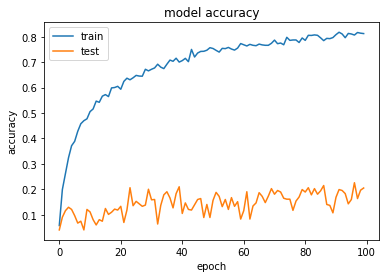

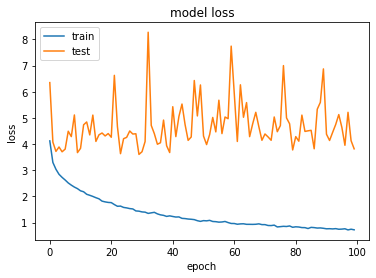

In [272]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [273]:
X_test_normalize = X_test/255.0

In [274]:
y_test = np.eye(PREDICT_CLASSES)[y_test] # PREDICT_CLASSES = 62
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [275]:
print(X_test_normalize.shape, y_test.shape)

(682, 784) (682, 62)


In [276]:
model.evaluate(X_test_normalize, y_test, batch_size=30)


682/682 [==============================] - 0s 105us/step


[3.8590581535943445, 0.2052785975099309]

### Let's make our model a better model

In [323]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import MaxPooling1D, BatchNormalization, Conv2D

In [353]:
print(X_train_normalize.shape)

(2728, 784)


In [361]:
images = df_image['image'].to_list()
len(images)

3410

In [363]:
array_list = np.asarray(images)

In [364]:
array_list.shape

(3410, 28, 28)

In [365]:
df_image

,image,labels
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0.0
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0.0
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0.0
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0.0
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0.0
...,...,...
3405,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",61.0
3406,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",61.0
3407,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",61.0
3408,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",61.0


In [427]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_image['image'], df_image['labels'], 
                                                    test_size=0.2, random_state=42)

In [428]:
X_train = np.asarray(X_train.to_list())
y_train = np.asarray(y_train.to_list())

X_test = np.asarray(X_test.to_list())
y_test = np.asarray(y_test.to_list())
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2728, 28, 28) (2728,)
(682, 28, 28) (682,)


In [429]:
y_train.astype(int)

array([47, 36, 37, ..., 23, 15, 57])

In [430]:
y_train = np.eye(PREDICT_CLASSES)[y_train.astype(int)] # PREDICT_CLASSES = 62
print(y_train.shape)
print(y_train)

(2728, 62)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [431]:
y_test = np.eye(PREDICT_CLASSES)[y_test.astype(int)] # PREDICT_CLASSES = 62
print(y_test.shape)

(682, 62)


In [448]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization

In [449]:
input_shape = (28,28)

In [450]:
model = Sequential()
model.add(Conv1D(500, kernel_size=3, activation='relu', input_shape=input_shape, name="dense1"))
model.add(BatchNormalization())
model.add(Conv1D(400, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(300, kernel_size=3, activation='relu', name="dense2"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv1D(200, kernel_size=3, activation='relu', name="dense3"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(100, activation='relu', name="dense4"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(90, activation='relu', name="dense5"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(62, activation='softmax', name="dense6"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [451]:
history = model.fit(X_train, y_train, epochs=80, batch_size=100, verbose=True, validation_split=0.3)

Train on 1909 samples, validate on 819 samples
Epoch 1/80
1909/1909 [==============================] - 8s 4ms/step - loss: 5.0217 - acc: 0.0257 - val_loss: 4.4195 - val_acc: 0.0269
Epoch 2/80
1909/1909 [==============================] - 3s 1ms/step - loss: 4.6430 - acc: 0.0304 - val_loss: 4.3235 - val_acc: 0.0391
Epoch 3/80
1909/1909 [==============================] - 3s 1ms/step - loss: 4.3750 - acc: 0.0492 - val_loss: 3.9633 - val_acc: 0.0952
Epoch 4/80
1909/1909 [==============================] - 3s 2ms/step - loss: 4.1146 - acc: 0.0676 - val_loss: 3.6622 - val_acc: 0.1368
Epoch 5/80
1909/1909 [==============================] - 3s 2ms/step - loss: 3.9194 - acc: 0.0932 - val_loss: 3.4227 - val_acc: 0.1685
Epoch 6/80
1909/1909 [==============================] - 3s 2ms/step - loss: 3.7323 - acc: 0.1105 - val_loss: 3.2534 - val_acc: 0.2002
Epoch 7/80
1909/1909 [==============================] - 3s 2ms/step - loss: 3.5757 - acc: 0.1236 - val_loss: 3.0866 - val_acc: 0.2112
Epoch 8/80
1909

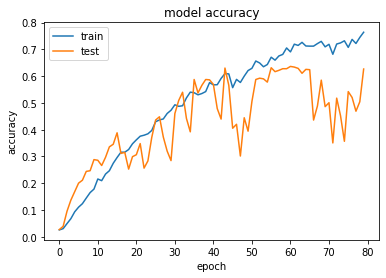

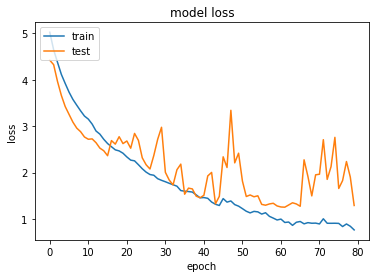

In [453]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [452]:
model.evaluate(X_test, y_test, batch_size=100)

682/682 [==============================] - 0s 388us/step


[1.293902708638099, 0.6319648130548315]

## Data augmentation

In [82]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

In [83]:
def proc_images_not_gray(images, labels):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    
    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
    WIDTH = 28
    HEIGHT = 28

    for img, label in zip(images, labels):

        # Read and resize image
        full_size_image = cv2.imread(img) #(img, 0) if we need a gray picture 
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        
        #Add labels
        y.append(label)
    return x,y

In [84]:
# Recover image and label one by one
list_of_images = df['image'].to_list()
list_of_labels = df['label'].to_list()
len(list_of_images), len(list_of_labels)

(3410, 3410)

In [85]:
x, y = proc_images_not_gray(list_of_images, list_of_labels)

In [86]:
# Set it up as a dataframe if you like
df_image_2 = pd.DataFrame()
df_image_2["image"]=x
df_image_2["labels"]=y

In [87]:
df_image_2

,image,labels
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
...,...,...
3405,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",z
3406,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",z
3407,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",z
3408,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",z


In [67]:
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
list_labels = df_image_2['labels'].to_list()
array = np.asarray(list_labels)
# reshape target to be a 2d array
y = array.reshape((len(array), 1))
result = encoder.fit_transform(y)
labels_in_array = [int(i) for i in result.T[0]] 
print(labels_in_array[:60])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [68]:
df_image_2['labels'] = result

In [69]:
df_image_2

,image,labels
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0
...,...,...
3405,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",61.0
3406,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",61.0
3407,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",61.0
3408,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",61.0


In [70]:
print(df_image_2['image'][0].shape)

(28, 28, 3)


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_image_2['image'], df_image_2['labels'], 
                                                    test_size=0.2, random_state=42)

In [96]:
print(y_train.shape, y_test.shape)

(2728,) (682,)


In [97]:
X_train = np.asarray(X_train.to_list())
y_train = np.asarray(y_train.to_list())

X_test = np.asarray(X_test.to_list())
y_test = np.asarray(y_test.to_list())
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2728, 28, 28, 3) (2728,)
(682, 28, 28, 3) (682,)


In [98]:
y_train.astype(int)

array([47, 36, 37, ..., 23, 15, 57])

In [99]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [100]:
print(y_train.shape, y_test.shape)

(2728, 62) (682, 62)


In [101]:
#Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)

In [102]:
input_shape = (28,28,3)

In [103]:
model = Sequential([
  Convolution2D(filters=128, kernel_size=(5,5), input_shape=input_shape, activation='relu', padding='same'),
  BatchNormalization(),
  Convolution2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
  BatchNormalization(),
  MaxPool2D((2,2)),
  Convolution2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
  BatchNormalization(),
  Convolution2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
  BatchNormalization(),
  MaxPool2D((2,2)),
  Convolution2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
  BatchNormalization(),
  Convolution2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
  BatchNormalization(),
  MaxPool2D((2,2)),
  Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
  BatchNormalization(),
  Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
  BatchNormalization(),
  Flatten(),
  Dense(units=300, activation="relu"),
  Dropout(0.15),
  Dense(units=100, activation="relu"),
  Dropout(0.05),
  Dense(units=62, activation="softmax")
])
optim = RMSprop(lr=0.001)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
batch_size = 64
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

In [105]:
history = model.fit_generator(train_generator,epochs=10,steps_per_epoch=100)

Epoch 1/10
100/100 [==============================] - 127s 1s/step - loss: 3.7752 - acc: 0.0771
Epoch 2/10
100/100 [==============================] - 125s 1s/step - loss: 2.9578 - acc: 0.2025
Epoch 3/10
100/100 [==============================] - 127s 1s/step - loss: 2.2719 - acc: 0.3443
Epoch 4/10
100/100 [==============================] - 130s 1s/step - loss: 1.7593 - acc: 0.4698
Epoch 5/10
100/100 [==============================] - 134s 1s/step - loss: 1.4033 - acc: 0.5605
Epoch 6/10
100/100 [==============================] - 133s 1s/step - loss: 1.1955 - acc: 0.6190
Epoch 7/10
100/100 [==============================] - 129s 1s/step - loss: 1.0518 - acc: 0.6629
Epoch 8/10
100/100 [==============================] - 122s 1s/step - loss: 0.9440 - acc: 0.6930
Epoch 9/10
100/100 [==============================] - 122s 1s/step - loss: 0.8475 - acc: 0.7165
Epoch 10/10
100/100 [==============================] - 122s 1s/step - loss: 0.7610 - acc: 0.7486


In [106]:
model.evaluate(X_test, y_test, batch_size=100)

682/682 [==============================] - 3s 5ms/sample - loss: 1.2866 - acc: 0.6041


[1.2865740571203819, 0.6041056]